In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

new norfolk au
arraial do cabo br
thompson ca
tuktoyaktuk ca
mlonggo id
utiroa ki
marcona pe
hilo us
dunedin nz
bethel us
albany au
santa rosalia mx
moscow us
vaini to
naze jp
butaritari ki
palmer us
marilandia br
port elizabeth za
parkes au
bam ir
vao nc
ostrovnoy ru
arraial do cabo br
george town ky
havre-saint-pierre ca
atikokan ca
butaritari ki
belushya guba ru
yellowknife ca
grindavik is
bredasdorp za
rikitea pf
port shepstone za
punta arenas cl
mitsamiouli km
mataura pf
presidencia roque saenz pena ar
jinchang cn
clyde river ca
los llanos de aridane es
kenai us
jamestown sh
marcona pe
mar del plata ar
esperance au
castro cl
albany au
nikolskoye ru
hilo us
illoqqortoormiut gl
atuona pf
vaini to
rikitea pf
pauini br
mys shmidta ru
norrtalje se
longyearbyen sj
ushuaia ar
kodiak us
yaan cn
villazon bo
albany au
channagiri in
busselton au
ribeira grande pt
samusu ws
dumka in
sinnamary gf
nikolskoye ru
new norfolk au
carutapera br
ushuaia ar
butaritari ki
saint-philippe re
taolanaro mg

plainview us
kemijarvi fi
mataura pf
ushuaia ar
la ronge ca
yellowknife ca
westport ie
barrow us
port alfred za
sitka us
komsomolskiy ru
georgetown sh
touros br
norman wells ca
ushuaia ar
marzuq ly
ponta do sol cv
hobart au
rikitea pf
bluff nz
new norfolk au
puerto ayora ec
warangal in
punta arenas cl
saskylakh ru
nome us
tasiilaq gl
urucara br
mataura pf
new norfolk au
ushuaia ar
jamestown sh
khatanga ru
mogadishu so
vestmannaeyjar is
dikson ru
thompson ca
kapaa us
mataura pf
ahipara nz
natchez us
hermanus za
punta arenas cl
bluff nz
rikitea pf
pangnirtung ca
yellowknife ca
kapaa us
besskorbnaya ru
cape town za
san fernando mx
korhogo ci
ushuaia ar
ambilobe mg
rikitea pf
bolshiye berezniki ru
doha qa
broome au
carroll us
rikitea pf
saint-philippe re
deputatskiy ru
chuy uy
avarua ck
punta arenas cl
tobol kz
albany au
avarua ck
mar del plata ar
mataura pf
port alfred za
attawapiskat ca
chokurdakh ru
progreso mx
illoqqortoormiut gl
taolanaro mg
saskylakh ru
carnarvon au
empangeni za
posh

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | arraial do cabo
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | mlonggo
Processing Record 6 of Set 1 | utiroa
City not found. Skipping...
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | dunedin
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | santa rosalia
Processing Record 13 of Set 1 | moscow
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | naze
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | palmer
Processing Record 18 of Set 1 | marilandia
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | parkes
Processing Record 21 of Set 1 | bam
Processing Record 22 of Set 1 | vao

Processing Record 36 of Set 4 | flinders
Processing Record 37 of Set 4 | severo-kurilsk
Processing Record 38 of Set 4 | alofi
Processing Record 39 of Set 4 | chokurdakh
Processing Record 40 of Set 4 | colac
Processing Record 41 of Set 4 | richards bay
Processing Record 42 of Set 4 | sonoita
Processing Record 43 of Set 4 | biltine
Processing Record 44 of Set 4 | diu
Processing Record 45 of Set 4 | sorland
Processing Record 46 of Set 4 | egvekinot
Processing Record 47 of Set 4 | coihaique
Processing Record 48 of Set 4 | lima
Processing Record 49 of Set 4 | valente
Processing Record 50 of Set 4 | xuddur
Processing Record 1 of Set 5 | nanakuli
Processing Record 2 of Set 5 | umm lajj
Processing Record 3 of Set 5 | bowen
Processing Record 4 of Set 5 | avarua
Processing Record 5 of Set 5 | oktyabrskiy
Processing Record 6 of Set 5 | ortigueira
Processing Record 7 of Set 5 | solovetskiy
City not found. Skipping...
Processing Record 8 of Set 5 | bozhou
Processing Record 9 of Set 5 | ixtapa
Proce

Processing Record 26 of Set 8 | dinar
Processing Record 27 of Set 8 | rurrenabaque
Processing Record 28 of Set 8 | rylsk
Processing Record 29 of Set 8 | lapugiu de jos
Processing Record 30 of Set 8 | hammerfest
Processing Record 31 of Set 8 | tsaratanana
Processing Record 32 of Set 8 | akhmim
Processing Record 33 of Set 8 | yenagoa
Processing Record 34 of Set 8 | yichang
Processing Record 35 of Set 8 | kenora
Processing Record 36 of Set 8 | kalmunai
Processing Record 37 of Set 8 | muzhi
Processing Record 38 of Set 8 | lompoc
Processing Record 39 of Set 8 | ust-kuyga
Processing Record 40 of Set 8 | oulu
Processing Record 41 of Set 8 | suhbaatar
Processing Record 42 of Set 8 | lucea
Processing Record 43 of Set 8 | puerto quijarro
Processing Record 44 of Set 8 | nicoya
Processing Record 45 of Set 8 | lusambo
Processing Record 46 of Set 8 | yulara
Processing Record 47 of Set 8 | nieuwpoort
Processing Record 48 of Set 8 | ryotsu
Processing Record 49 of Set 8 | yantal
Processing Record 50 of

Processing Record 12 of Set 12 | katobu
Processing Record 13 of Set 12 | moerai
Processing Record 14 of Set 12 | santa marta
Processing Record 15 of Set 12 | marawi
Processing Record 16 of Set 12 | kuzovatovo
Processing Record 17 of Set 12 | sao joao da barra
Processing Record 18 of Set 12 | mahajanga
Processing Record 19 of Set 12 | samana
Processing Record 20 of Set 12 | praia
Processing Record 21 of Set 12 | canavieiras
Processing Record 22 of Set 12 | warrnambool
Processing Record 23 of Set 12 | zeya
Processing Record 24 of Set 12 | ancud
Processing Record 25 of Set 12 | srednekolymsk
Processing Record 26 of Set 12 | nhulunbuy
Processing Record 27 of Set 12 | zhigalovo
Processing Record 28 of Set 12 | praia da vitoria
Processing Record 29 of Set 12 | grosse pointe farms
Processing Record 30 of Set 12 | potosi
Processing Record 31 of Set 12 | nyimba
Processing Record 32 of Set 12 | comodoro rivadavia
Processing Record 33 of Set 12 | palu
Processing Record 34 of Set 12 | nantucket
Pr

In [9]:
# Print the city count to confirm sufficient count.
len(cities)

597

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.78,147.06,57.99,63,98,3.94,AU,2020-10-28 01:09:37
1,Arraial Do Cabo,-22.97,-42.03,73.40,94,0,13.87,BR,2020-10-28 01:07:17
2,Thompson,55.74,-97.86,24.80,68,75,9.17,CA,2020-10-28 01:07:32
3,Tuktoyaktuk,69.45,-133.04,12.20,92,90,12.75,CA,2020-10-28 01:08:20
4,Mlonggo,-6.53,110.70,82.81,73,17,7.81,ID,2020-10-28 01:09:37
5,Hilo,19.73,-155.09,80.60,74,90,9.17,US,2020-10-28 01:07:11
6,Dunedin,-45.87,170.50,54.00,70,37,20.00,NZ,2020-10-28 01:09:38
7,Bethel,41.37,-73.41,50.00,75,100,3.65,US,2020-10-28 01:09:38
8,Albany,42.60,-73.97,46.00,77,100,1.70,US,2020-10-28 01:07:09
9,Santa Rosalia,27.32,-112.28,63.66,47,0,18.43,MX,2020-10-28 01:09:39


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import the time module.
import time

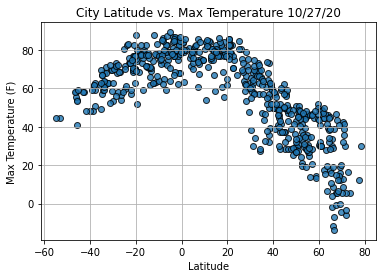

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

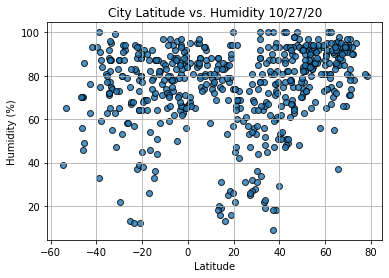

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

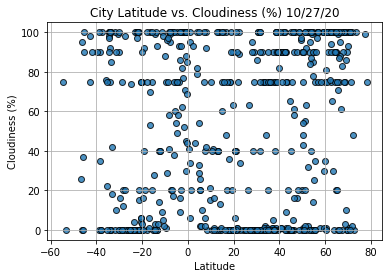

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

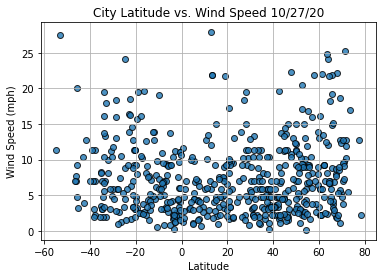

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                   Butaritari
Lat                          3.07
Lng                        172.79
Max Temp                       81
Humidity                       65
Cloudiness                     44
Wind Speed                   3.02
Country                        KI
Date          2020-10-28 01:07:09
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Thompson,55.74,-97.86,24.80,68,75,9.17,CA,2020-10-28 01:07:32
3,Tuktoyaktuk,69.45,-133.04,12.20,92,90,12.75,CA,2020-10-28 01:08:20
5,Hilo,19.73,-155.09,80.60,74,90,9.17,US,2020-10-28 01:07:11
7,Bethel,41.37,-73.41,50.00,75,100,3.65,US,2020-10-28 01:09:38
8,Albany,42.60,-73.97,46.00,77,100,1.70,US,2020-10-28 01:07:09
...,...,...,...,...,...,...,...,...,...
545,Romny,50.75,33.47,45.16,63,0,8.90,UA,2020-10-28 01:11:39
547,Urumqi,43.80,87.60,37.40,51,1,4.47,CN,2020-10-28 01:11:08
549,Karaidel,55.83,56.91,28.90,91,90,6.82,RU,2020-10-28 01:11:39
550,Rafai,4.95,23.92,70.36,97,100,1.01,CF,2020-10-28 01:11:07


In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Thompson,55.74,-97.86,24.80,68,75,9.17,CA,2020-10-28 01:07:32
3,Tuktoyaktuk,69.45,-133.04,12.20,92,90,12.75,CA,2020-10-28 01:08:20
5,Hilo,19.73,-155.09,80.60,74,90,9.17,US,2020-10-28 01:07:11
7,Bethel,41.37,-73.41,50.00,75,100,3.65,US,2020-10-28 01:09:38
8,Albany,42.60,-73.97,46.00,77,100,1.70,US,2020-10-28 01:07:09
...,...,...,...,...,...,...,...,...,...
545,Romny,50.75,33.47,45.16,63,0,8.90,UA,2020-10-28 01:11:39
547,Urumqi,43.80,87.60,37.40,51,1,4.47,CN,2020-10-28 01:11:08
549,Karaidel,55.83,56.91,28.90,91,90,6.82,RU,2020-10-28 01:11:39
550,Rafai,4.95,23.92,70.36,97,100,1.01,CF,2020-10-28 01:11:07


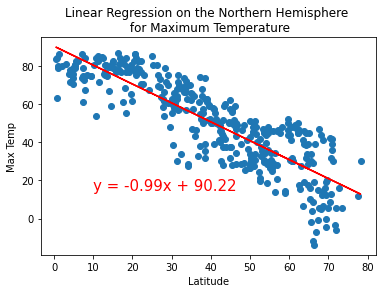

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for Maximum Temperature")
plot_linear_regression (x_values, y_values,
                    'Linear Regression on the Northern Hemisphere for Maximum Temperature','Max Temp',(10,15))

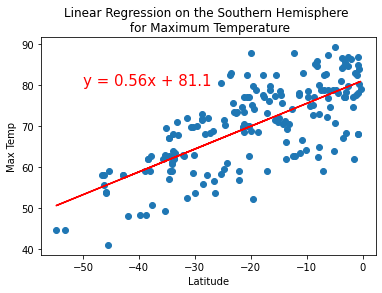

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for Maximum Temperature")
plot_linear_regression (x_values, y_values,
                    'Linear Regression on the Southern Hemisphere for Maximum Temperature','Max Temp',(-50,80))

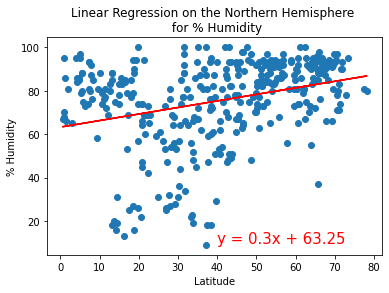

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for % Humidity")
plot_linear_regression (x_values, y_values,
                    'Linear Regression on the Northern Hemisphere for % Humidity','% Humidity',(40,10))

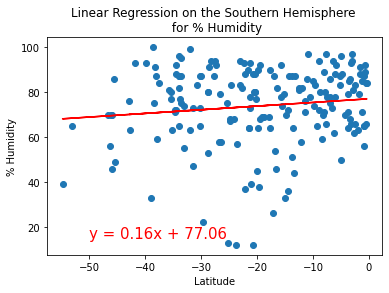

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for % Humidity")
plot_linear_regression (x_values, y_values,
                    'Linear Regression on the Southern Hemisphere for % Humidity','% Humidity',(-50,15))

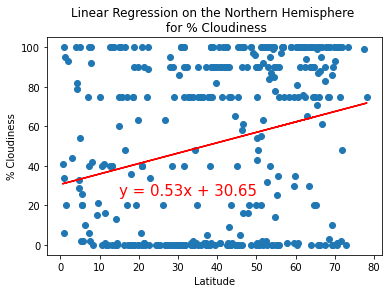

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for % Cloudiness")
plot_linear_regression (x_values, y_values,
                    'Linear Regression on the Northern Hemisphere for % Cloudiness','% Cloudiness',(15,25))

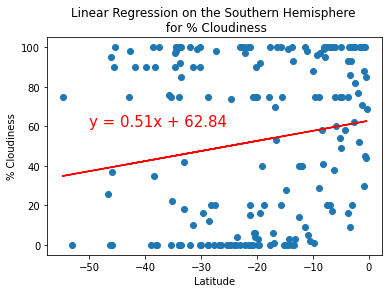

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for % Cloudiness")
plot_linear_regression (x_values, y_values,
                    'Linear Regression on the Southern Hemisphere for % Cloudiness','% Cloudiness',(-50,60))

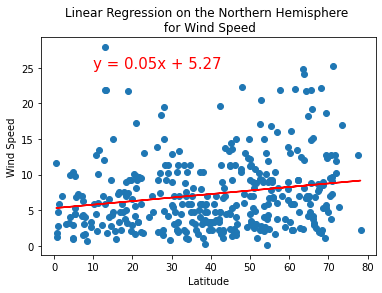

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")
plot_linear_regression (x_values, y_values,
                    'Linear Regression on the Northern Hemisphere for Wind Speed','Wind Speed',(10,25))

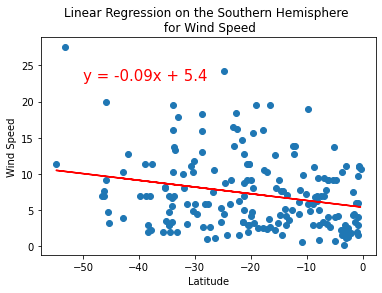

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plt.title("Linear Regression on the Southern Hemisphere \n for Wind Speed")
plot_linear_regression (x_values, y_values,
                    'Linear Regression on the Southern Hemisphere for Wind Speed','Wind Speed',(-50,23))